In [1]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Generate data
x_line,y_line=make_blobs(n_samples=1000,n_features=3,centers=2,random_state=20)
x_circle,y_circle=make_circles(n_samples=1000,noise=0.1,factor=0.2,random_state=20)
x_line=pd.DataFrame(x_line)
x_circle=pd.DataFrame(x_circle)
x_line[2]=1
x_circle[2]=1

In [3]:
# Function to generate polynomial features
def polynomial_features(x,degree):
    x_poly=pd.DataFrame()
    for i in range(len(x.columns)):
        for j in x.columns:
            x_poly[str(i)+'*'+str(j)]=x[i]*x[j]        
    return x_poly

In [4]:
x_circle=polynomial_features(x_circle,degree=2)
x_circle.head()

,0*0,0*1,0*2,1*0,1*1,1*2,2*0,2*1,2*2
0,0.003991,-0.007601,0.063178,-0.007601,0.014476,-0.120315,0.063178,-0.120315,1
1,0.015935,-0.026208,-0.126236,-0.026208,0.043102,0.207610,-0.126236,0.207610,1
2,0.019274,0.018544,-0.138832,0.018544,0.017841,-0.133572,-0.138832,-0.133572,1
3,0.110230,-0.314171,-0.332008,-0.314171,0.895433,0.946273,-0.332008,0.946273,1
4,0.000269,-0.004824,0.016415,-0.004824,0.086372,-0.293892,0.016415,-0.293892,1


In [5]:
#split data into train and test
x1_train, x1_test, y1_train, y1_test = train_test_split(x_line, y_line, test_size=0.5, random_state=40)
x2_train, x2_test, y2_train, y2_test = train_test_split(x_circle, y_circle, test_size=0.5, random_state=40)


<AxesSubplot:xlabel='0', ylabel='1'>

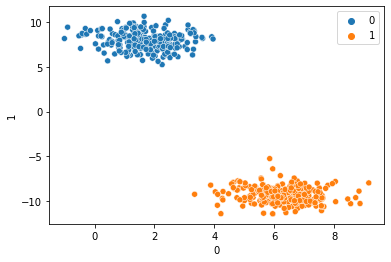

In [6]:
sns.scatterplot(x=x1_train[0], y=x1_train[1], hue=y1_train)

<AxesSubplot:xlabel='0*2', ylabel='1*2'>

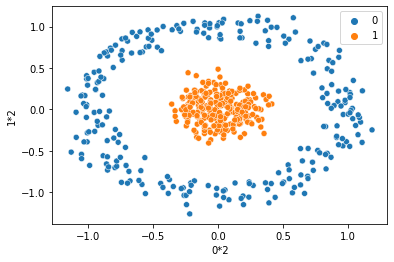

In [7]:
sns.scatterplot(x=x2_train["0*2"], y=x2_train["1*2"], hue=y2_train)

In [8]:
# Perceptron Algorithm
def perceptron(x,y):
    m=len(x)
    n=len(x.columns)
    j=m
    k=100
    w=np.random.rand(n)
    # Loop until convergence or max iterations k
    while(k!=0 and j!=0):
        k-=1
        j=0
        for i in range(m):
            dw=0
            if((w.T@x.iloc[i,:])<0 and y[i]==1):
                dw=x.iloc[i,:]
                j+=1
            elif((w.T@x.iloc[i,:])>=0 and y[i]==0):
                dw=-x.iloc[i,:]
                j+=1
            w=w+dw
        
    return w

In [9]:
def h(z):
    if z>=0:
        return 1
    else:
        return 0

In [10]:
# Final weights
w1=perceptron(x1_train,y1_train)
w2=perceptron(x2_train,y2_train)

In [11]:
# For make blob, predict on test data
pred=[]
k=0
for i in range(len(x1_test)):
    z=w1.T@x1_test.iloc[i,:]
    pred.append(h(z))
    if(h(z)==y1_test[i]):
        k+=1
print("Accuracy for make_blob on test data =",k/len(x1_test)*100,"%")

Accuracy for make_blob on test data = 100.0 %


In [12]:
# For make circle, predict on test data
pred=[]
k=0
for i in range(len(x2_test)):
    z=w2.T@x2_test.iloc[i,:]
    pred.append(h(z))
    if(h(z)==y2_test[i]):
        k+=1
print("Accuracy for make_circle on test data =",k/len(x2_test)*100,"%")

Accuracy for make_circle on test data = 99.6 %
